In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data=pd.read_csv("C:/Users/Hp/Downloads/Fraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [36]:
data['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [80]:
data=data.drop(columns=['nameOrig','nameDest'],axis=1)

In [8]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 1
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

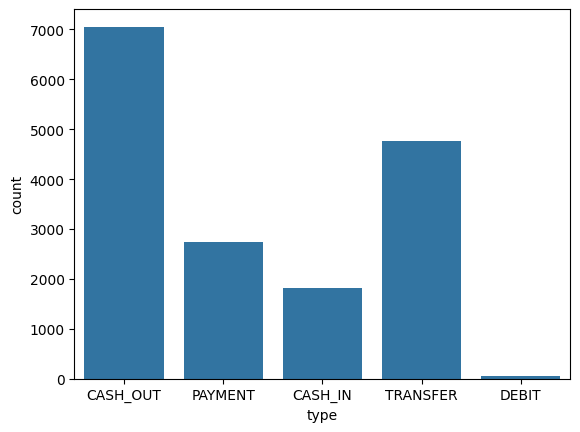

In [13]:
sns.countplot(x='type', data=data)

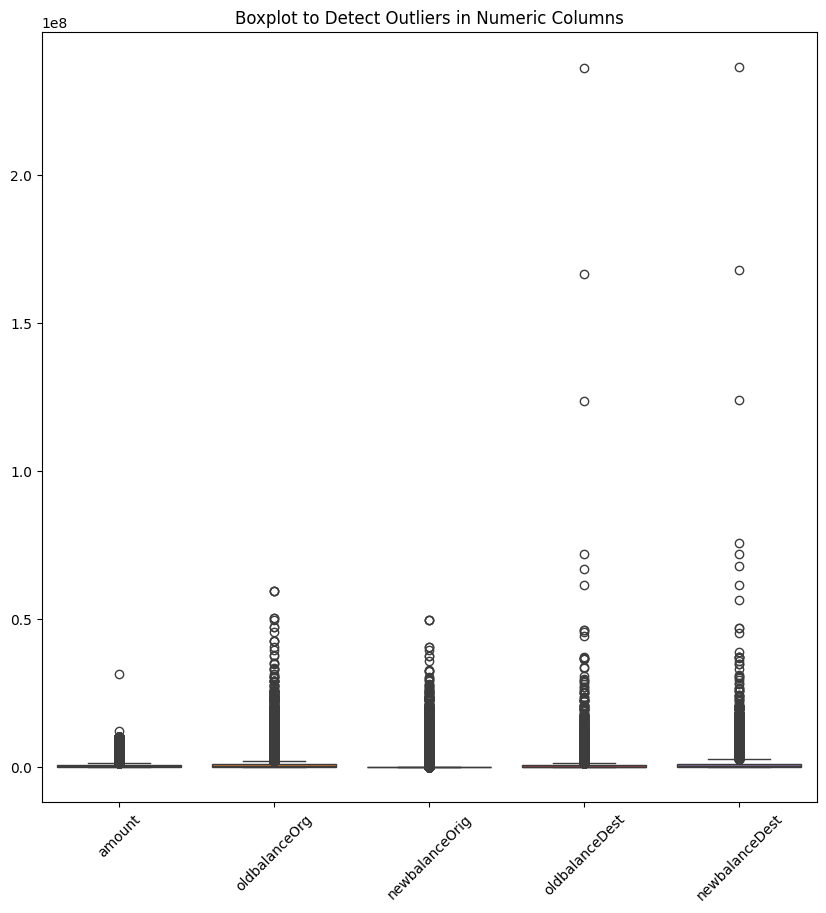

In [63]:
numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(10,10))
sns.boxplot(data=data[numeric_cols])
plt.title('Boxplot to Detect Outliers in Numeric Columns')
plt.xticks(rotation=45)
plt.show()

In [67]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("\nData after outlier removal:")
print(data.describe())


Data after outlier removal:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  3.251409e+06  3.251409e+06   3.251409e+06    3.251409e+06   
mean   2.457371e+02  8.321798e+04   1.688549e+04    5.039258e+03   
std    1.414122e+02  1.083939e+05   3.138389e+04    1.238051e+04   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.570000e+02  8.450540e+03   0.000000e+00    0.000000e+00   
50%    2.500000e+02  2.606645e+04   6.930000e+02    0.000000e+00   
75%    3.380000e+02  1.305956e+05   2.135700e+04    0.000000e+00   
max    7.420000e+02  5.017184e+05   2.835720e+05    6.041985e+04   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    3.251409e+06    3.251409e+06  3.251409e+06       3251409.0  
mean     1.539047e+05    2.305345e+05  9.309810e-04             0.0  
std      2.669779e+05    3.319297e+05  3.049778e-02             0.0  
min      0.000000e+00    0.000000e+00  0.000000e+00             0.0  
25%     

In [69]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

def calculate_vif(dataframe, features):
    
    X = dataframe[features].copy()
    X['Intercept'] = 1

    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    
 
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif_data = vif_data[vif_data['Feature'] != 'Intercept']
    
    return vif_data

numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

vif_results = calculate_vif(data, numeric_cols)

print(vif_results)


          Feature        VIF
0          amount   6.131316
1   oldbalanceOrg   1.390327
2  newbalanceOrig   1.386753
3  oldbalanceDest  28.282570
4  newbalanceDest  41.688137


In [70]:
df_reduced = data.drop(['newbalanceDest'], axis=1)  # Example: Dropping 'newbalanceDest'

numeric_cols_reduced = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest']  # Updated list of features
vif_results_reduced = calculate_vif(df_reduced, numeric_cols_reduced)

print(vif_results_reduced)


          Feature       VIF
0          amount  1.434432
1   oldbalanceOrg  1.390116
2  newbalanceOrig  1.385899
3  oldbalanceDest  1.200105


<Axes: xlabel='isFraud', ylabel='count'>

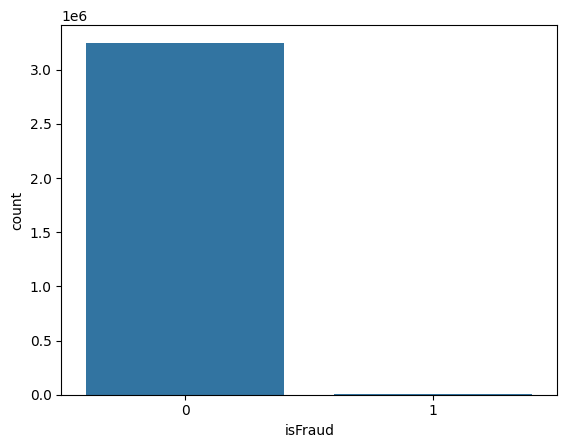

In [71]:
sns.countplot(x='isFraud', data=data)

In [72]:
data['isFraud'].value_counts()

isFraud
0    3248382
1       3027
Name: count, dtype: int64

In [73]:
from sklearn.utils import resample

df_majority = data[data.isFraud == 0]
df_minority = data[data.isFraud == 1]

min_count = min(len(df_majority), len(df_minority))

df_majority_downsampled = resample(df_majority,
                                   replace=False, 
                                   n_samples=min_count, 
                                   random_state=42)

df_minority_upsampled = resample(df_minority,
                                 replace=True, 
                                 n_samples=min_count,  
                                 random_state=42)


data = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [74]:
data['isFraud'].value_counts()

isFraud
0    3027
1    3027
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='Count'>

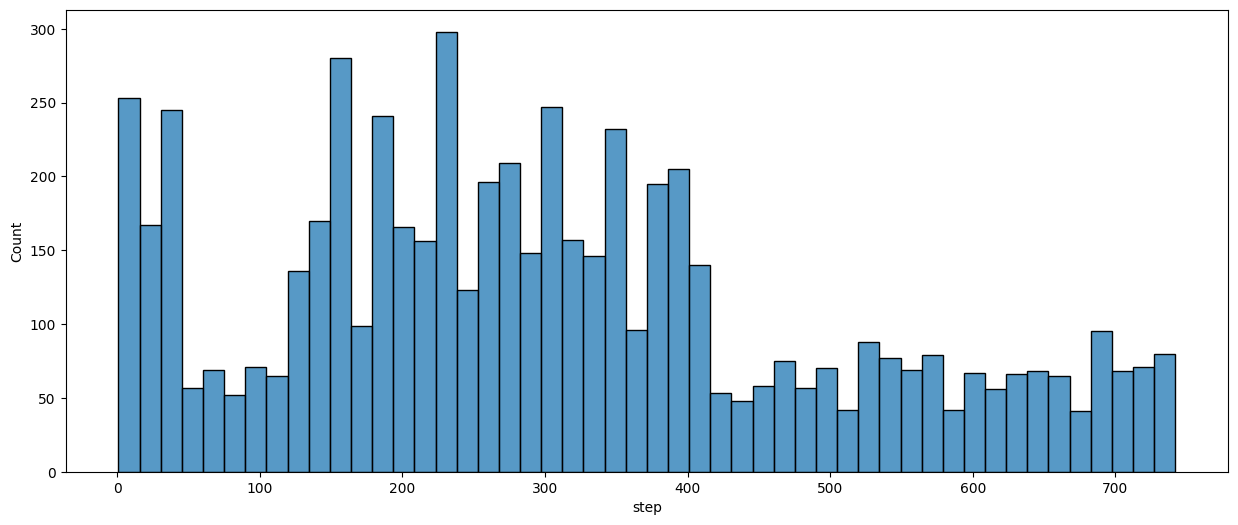

In [75]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50)

<Axes: xlabel='type', ylabel='amount'>

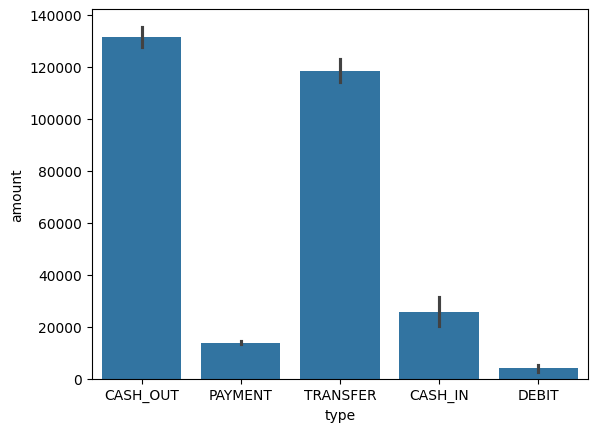

In [76]:
sns.barplot(x='type', y='amount', data=data)

In [77]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

In [78]:
data['type'].value_counts()

type
1    2712
4    1779
3    1510
0      36
2      17
Name: count, dtype: int64

<Axes: >

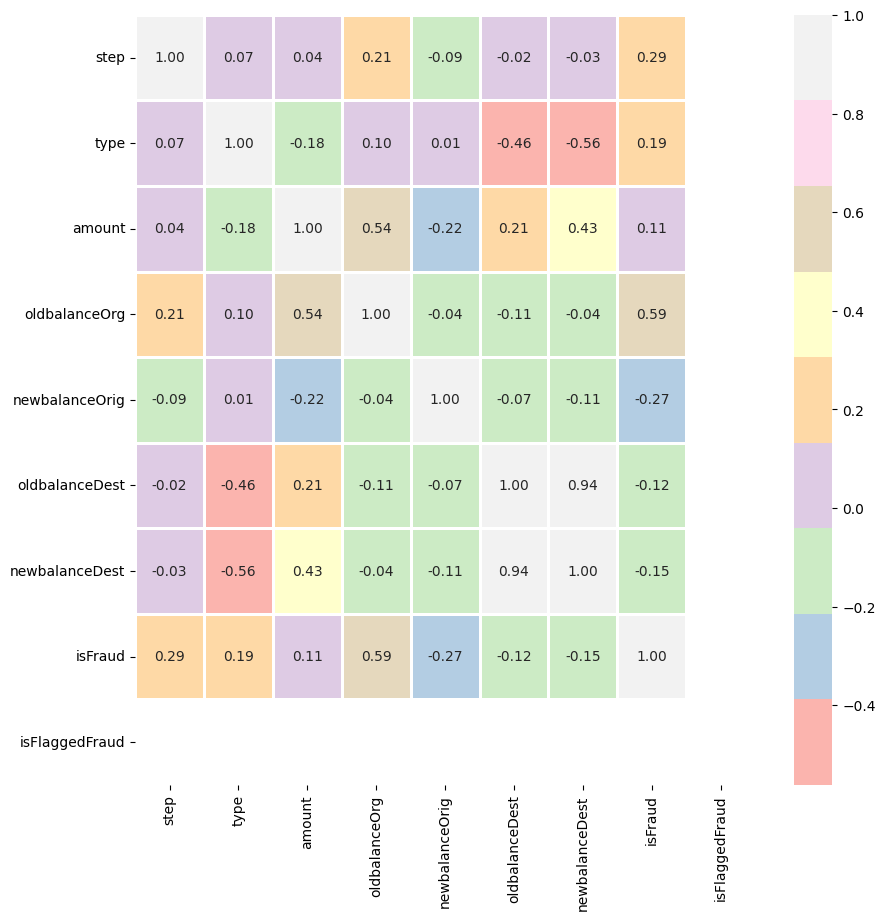

In [81]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),
			cmap='Pastel1',
			fmt='.2f',
			linewidths=2,
			annot=True)


In [82]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,1,2,3,4
2575327,207,1,333346.51,1508.00,0.0,375243.78,708590.29,0,0,True,False,False,False
1013640,46,3,653.14,5679.74,5026.6,0.00,0.00,0,0,False,False,True,False
3806333,281,3,8545.15,0.00,0.0,0.00,0.00,0,0,False,False,True,False
5738586,399,1,440297.50,3984.00,0.0,0.00,440297.50,0,0,True,False,False,False
1083842,129,1,340697.01,1798.00,0.0,0.00,340697.01,0,0,True,False,False,False


In [83]:
X = data_new.drop(['isFraud', 'type','isFlaggedFraud','newbalanceDest'], axis=1)
y = data_new['isFraud']

In [84]:
X.shape, y.shape

((6054, 9), (6054,))

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)

In [86]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [87]:
import warnings
from sklearn.metrics import roc_auc_score
warnings.filterwarnings('ignore')

models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True),
          RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)]

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

best_model = None
best_accuracy = 0

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)

    train_preds = model.predict_proba(X_train)[:, 1]
    train_accuracy = roc_auc_score(y_train, train_preds)

    val_preds = model.predict_proba(X_test)[:, 1]
    val_accuracy = roc_auc_score(y_test, val_preds)


    print(f'{model}:')
    print('Training Accuracy:', train_accuracy)
    print('Validation Accuracy:', val_accuracy)
    print("---------------------------------------------------")

    
    if val_accuracy > best_accuracy:
        best_model = model
        best_accuracy = val_accuracy

print('Best Model:', best_model)
print('Best Validation Accuracy:', best_accuracy)


LogisticRegression():
Training Accuracy: 0.9897843435705324
Validation Accuracy: 0.9897424080721838
---------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Accuracy: 1.0
Validation Accuracy: 0.9989097215484622
--------------------------

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Pastel1', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


NameError: name 'best_model' is not defined

In [2]:
import numpy as np

def user_input():
    print("Please enter the transaction details:")
    step = int(input("Step: "))
    amount = float(input("Amount: "))
    oldbalanceOrg = float(input("Old Balance Origin: "))
    newbalanceOrig = float(input("New Balance Origin: "))
    oldbalanceDest = float(input("Old Balance Destination: "))
    newbalanceDest = float(input("New Balance Destination: "))
    # Assuming columns 7 to 10 are boolean features
    feature_1 = bool(input("Feature 1 (True or False): "))
    feature_2 = bool(input("Feature 2 (True or False): "))
    feature_3 = bool(input("Feature 3 (True or False): "))
    feature_4 = bool(input("Feature 4 (True or False): "))

    user_input_data = np.array([[step, amount, oldbalanceOrg, newbalanceOrig,
                                 oldbalanceDest,feature_1, feature_2, feature_3, feature_4]])

    return user_input_data

def predict_fraud(model, user_input_data):
    prediction = model.predict(user_input_data)
    return prediction

user_data = user_input()
predicted_fraud = predict_fraud(best_model, user_data)

if predicted_fraud == 1:
    print("The transaction is predicted to be fraud.")
else:
    print("The transaction is predicted not to be fraud.")


Please enter the transaction details:


Step:  137
Amount:  521.7
Old Balance Origin:  0.0
New Balance Origin:  0.0
Old Balance Destination:  0.0
New Balance Destination:  0.0
Feature 1 (True or False):  0
Feature 2 (True or False):  0
Feature 3 (True or False):  1
Feature 4 (True or False):  0


NameError: name 'best_model' is not defined